# TP5 - Jordan Charest et Benjamin Claveau

## Constantes et modules

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from util import readAngles, readSinogram, saveImage
from reconstruction import readInput, laminogram, backproject, backproject_interpol
import geometry as geo
from CTfiltre import filterSinogram
import timeit
import util as util

geo.nbvox = 96
geo.voxsize = 0.4

## Question 1

Dans un but de reconstruction tomographique, on peut modéliser l'atténuation du rayonnement qui passe à travers un objet par la loi de Beer-Lambert:
$$I = I_0e^{-\int\mu(x)\text{d}x}$$
Sous forme discrétisée, on a:
$$I = I_0e^{-\sum\mu(x)\Delta x}$$
où $I$  est l'intensité détectée, $I_0$ est l'intensité initiale, $\mu$ est le coefficient d'atténuation linéaire et $x$ est la distance traversée par les rayons. Sous forme linéaire, on a:
$$\ln\bigg(\frac{I_0}{I}\bigg) = \sum\mu(x)\Delta x$$
Pour simplifier le problème, on peut considérer le corps humain comme étant composé d'eau pure. On peut alors déterminer la fraction du signal qui traverse le corps humain en utilisant le coefficient $\mu$ de l'eau. Selon les données XCOM du NIST [1], En considérant des photons ayant une énergie initiale de 60 keV, l'atténuation dans l'eau est de $2,059\times10^{-1}\ \text{cm}^2/g$. Pour une masse volumique de $1\ \text{g/cm}^3$, on obtient le paramètre $\mu(x)$ suivant:
$$\mu(x) = 2,059\times10^{-1}\ \text{cm}^2/g \times 1\ \text{g/cm}^3 = 2,059\times10^{-1}\ \text{cm}^{-1}$$
On peut alors déterminer la fraction du signal qui va être mesurée après avoir parcouru une distance donnée dans l'eau. Pour une distance de 5 cm, on a
$$\frac{I}{I_0} = e^{-\int \mu(x)\\text{d}x}$$
$$\frac{I}{I_0} = e^{-\int_0^5 2,059\times10^{-1}\text{d}x}$$
$$\frac{I}{I_0} = 0,3572$$
On observera donc 35,8 % de l'intensité du faisceau incident pour une distance de 5 cm dans l'eau (ou le corps humain). Pour une distance de 20 cm, on a:
$$\frac{I}{I_0} = e^{-\int_0^20 2,059\times10^{-1}\text{d}x}$$
$$\frac{I}{I_0} = 0,0163$$
On mesurera donc 1,63 % de l'intensité du faisceau initial pour une distance de 20 cm parcourue dans l'eau.

## Question 2

On veut maintenant développer une méthode de reconstruction toomographique afin de pouvoir reconstruire des images de tomodensitométrie. Le fichier *sinogram-patient.txt* correspond au sinogramme d'une image de tomodensitométrie qu'on souhaite reconstruire. Le fichier *sinogram-password.txt* contient le sinogramme d'un mot de passe qui permet d'accéder à l'image contenue dans *sinogram-patient.txt*, fournie à des fins de comparaisons avec les résultats obtenus.

Pour effectuer la reconstruction, on utilise la rétroprojection, qui consiste à *étaler* chaque pixel de chaque projection sur la trajectoire dont il mesure l'absorption. On utilise ensuite une approche *voxel-driven* pour déterminer, pour chaque voxel, la contribution de chaque projection sur le voxel. On doit donc calculer, pour chaque orientation, quelle trajectoire passe le plus près du voxel d'intérêt. Pour ce faire, il est pratique d'exprimer la position de chaque pixel en coordonnées polaires avec l'origine au centre de l'image. On obtient alors la situation représentée à la figure 1. La quantité qui nous intéresse ici est la distance $d$ pour chaque projection avec une orientation $\theta$, car celle-ci nous renseigne sur la position du pixel qui mesure l'absorption du voxel. Un fois que nous connaissons la position du bon pixel, on peut simplement additionner la valeur de celui-ci au voxel. On répéte ensuite l'opération pour chaque orientation et éventuellement pour chaque voxel afin de recréer l'image.

<center><img src="Situation_Q2.png" style="width: 400px;"/></center>
<center>Figure 1. Reconstruction par méthode voxel-driven

La reconstruction par rétroprojection est implémentée dans la fonction *laminogram* du fichier *reconstruction.py*. Les constantes utilisées par la méthode, comme la taille et le nombre des pixels et des voxels, ainsi que les noms des fichiers de données sont définis dans le fichier *geometry.py*. Des méthodes générales utilisées dans *reconstruction.py* sont définies dans le fichier *util.py*.

La fonction *laminogram* ne prend aucun argument, mais utilise les données fournies par *readInput*, une fonction définie dans *reconstruction.py* qui extrait les données à partir des fichiers de données en format *.txt*. Elle effectue ensuite le processus itératif de l'approche *voxel-driven*. Tout d'abord, la position du voxel d'intérêt en coordonnées cartésiennes est déterminée à partir des indices de celui-ci et des constantes définies dans *geometry.py*. On effectue ensuite le changement de coordonnées afin d'avoir la position du pixel en coordonnées polaires. On détermine ensuite la distance $d$ à partir de la position en coordonnées polaires et de l'orientation de la projection. En arrondissant, on obtient l'indice correspondant au bon pixel. On additionne sa valeur au voxel et on répète le processus pour toutes les projections. En répétant ce processus pour tous les voxels, on obtient la reconstruction tomographique du sinogramme.

La reconstruction du sinogramme du mot de passe correspond à *mdp_laminogram.png* et on voit que le mot de passe est *Z8HA9*. On effectue ensuite la reconstruction de l'image médicale.

nbprj: 720
angles min and max (rad):
[0.008726646259971648, 6.283185307179586]
working on image column: 1/96
working on image column: 2/96
working on image column: 3/96
working on image column: 4/96
working on image column: 5/96
working on image column: 6/96
working on image column: 7/96
working on image column: 8/96
working on image column: 9/96
working on image column: 10/96
working on image column: 11/96
working on image column: 12/96
working on image column: 13/96
working on image column: 14/96
working on image column: 15/96
working on image column: 16/96
working on image column: 17/96
working on image column: 18/96
working on image column: 19/96
working on image column: 20/96
working on image column: 21/96
working on image column: 22/96
working on image column: 23/96
working on image column: 24/96
working on image column: 25/96
working on image column: 26/96
working on image column: 27/96
working on image column: 28/96
working on image column: 29/96
working on image column: 30/96


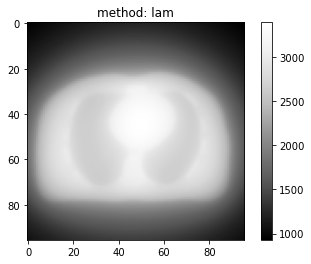

In [28]:
t1 = timeit.default_timer()
laminogram()
t2 = timeit.default_timer()
print(f"Temps: {t2-t1:.2f} secondes")

L'image médicale reconstruite est enregistrée comme *patient_laminogram.png*. On peut maintenant comparer la reconstruction avec l'image de référence présentée à la figure 2.

<center><img src="patient_ref.png" style="width: 220px;"/></center>
<center>Figure 2. Image de référence du sinogramme du patient

Le constraste de l'image reconstruite n'est pas aussi bon que celui de l'image de référence. Sur la reconstruction, une sorte de flou lumineux qui empêche de bien distinguer les éléments présents. Les contours sont beaucoup mieux définis et beaucoup plus faciles à observer sur l'image de référence. Certaines structures, comme les petits corps blancs autour de ce qui semble être les poumons, ne peuvent pas être observées sur la reconstruction. La différence entre les tons de gris des différentes parties de l'image est également moins prononcée sur la reconstruction, ce qui nuit aussi à la qualité de l'image.

## Question 3

On veut maintenant améliorer la reconstruction du sinogramme. Pour ce faire, on peut appliquer un filtre passe-haut sur le sinogramme afin de tenter d'éliminer le "flou lumineux", qui est principalement contenu dans les basses fréquences. Comme filtre passe-haut, on choisit simplement de multiplier la transformée de Fourier du sinogramme par $|u|$, où $u$ correspond à la variable dépendante dans l'espace des fréquences. Le filtre va donc bel et bien favoriser les hautes fréquentes, où $u$ est grand, et défavoriser les basses fréquences, où $u$ est petit.

On crée alors les fonctions *filterLine* et *filterSinogram* dans le fichier *CTfiltre.py*. La fonction *filterLine* prend en argument une projection contenue dans une ligne du sinogramme et et retourne celle-ci avec le filtre passe-haut appliqué. Pour ce faire, elle effectue d'abord la tranformée de Fourier de la projection à l'aide de la fonction *numpy.fft.fft*, détermine les valeurs discrétisées de $u$ associées à la transformée de Fourier grâce à la fonction *numpy.fft.fftfreq*, multiplie la transformée de Fourier par $|u|$ puis retourne la transformée de Fourier inverse de la projection avec *numpy.fft.ifft*. La fonction *filterSinogram* prend en entrée un sinogramme et applique le filtre sur toutes ses projections en utilisant *filterLine*. Elle retourne le sinogramme résultant.

On affiche et sauvegarde l'image du sinogramme non-filtré du patient comme *sino_non-filtre.png* et celle du sinogramme filtré du patient comme *sino_filtre.png*.

nbprj: 720
angles min and max (rad):
[0.008726646259971648, 6.283185307179586]


c:\Users\Jordan\Desktop\Python\GitHub_Repositories\PhysNum\TP5\CTfiltre.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  sinogram[i] = filterLine(sinogram[i])


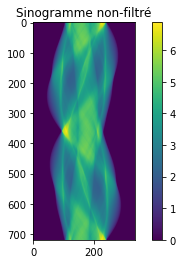

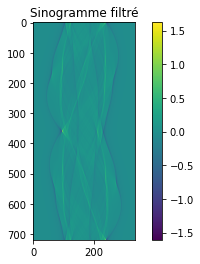

In [29]:
# on récupère le sinogramme du patient
sino = readInput()[2]

# on affiche et sauvegarde le sinogramme non-filté
fig1 = plt.figure()
plt.title("Sinogramme non-filtré")
plt.imshow(sino)
plt.colorbar()
plt.savefig("sino_non-filtre.png")

# on filtre le sinogramme
filterSinogram(sino)

# on affiche et sauvegarde le sinogramme filtré
fig2 = plt.figure()
plt.title("Sinogramme filtré")
plt.imshow(sino)
plt.colorbar()
plt.savefig("sino_filtre.png")

Le sinogramme non-filtré comporte des valeurs srtictement positives où le 0 signifie une atténuation nulle. Sur le sinogramme filtré, on observe plutôt un fond à 0 partout avec les constrastes positifs ou négatifs qui ressortent. C'est ce à quoi on s'attendait, car les contrastes et les détails sont stockés dans les petites fréquences, tandis que les valeurs générales des zones sont stockées dans les basses fréquences. C'est aussi prometteur pour notre reconstruction, car on souhaite pouvoir mieux observer les détails sur l'image reconstruite.

## Question 4

On utilise maintenant les fonctions contenues dans *CTfiltre.py* pour créer la fonction *backproject*, située dans *reconstruction.py*. Celle-ci fonctionne exactement comme la fonction *laminogram*, mais, avant d'effectuer le processus itératif, elle applique le filtre passe-haut déterminé à la question 3 grâce à la fonction *filterSinogram*.

On peut ensuite reconstruire les deux sinogrammes. La reconstruction du mot de passe est enregistrée comme *mdp_backproject.png* et celle du patient est enregistrée comme *patient_backproject.png*.

nbprj: 720
angles min and max (rad):
[0.008726646259971648, 6.283185307179586]
working on image column: 1/96
working on image column: 2/96
working on image column: 3/96
working on image column: 4/96
working on image column: 5/96
working on image column: 6/96
working on image column: 7/96
working on image column: 8/96
working on image column: 9/96
working on image column: 10/96
working on image column: 11/96
working on image column: 12/96
working on image column: 13/96
working on image column: 14/96
working on image column: 15/96
working on image column: 16/96
working on image column: 17/96
working on image column: 18/96
working on image column: 19/96
working on image column: 20/96
working on image column: 21/96
working on image column: 22/96
working on image column: 23/96
working on image column: 24/96
working on image column: 25/96
working on image column: 26/96
working on image column: 27/96
working on image column: 28/96
working on image column: 29/96
working on image column: 30/96


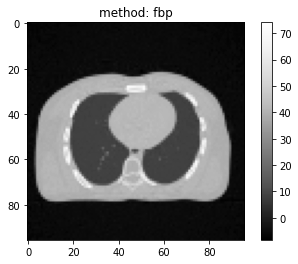

In [30]:
t1 = timeit.default_timer()
backproject()
t2 = timeit.default_timer()
print(f"Temps: {t2-t1:.2f}")

En comparant avec le fantôme numérique, on observe que la reconstruction filtrée est de bien meilleure qualité que la reconstruction non filtrée. Par contre, il reste tout de même des erreurs semblables à du bruit, donc de très hautes fréquences. Ces erreurs sont facilement observables dans la région noire de l'image, qui est d'un noir plus uni sur le fantôme numérique que sur la reconstruction. Pour référence future, on note que le temps d'exécution de la cellule de code qui exécute la fonction *backproject* comporte un temps d'exécution de 2 minutes et 4,1 secondes.

## Question 5

Toujours dans le but d'améliorer la qualité de la reconstruction, on peut remplacer la méthode du plus proche voisin, qui consistait à prendre la valeur du pixel dont la trajectoire passe le plus près du centre du voxel, par une interpolation linéaire des deux trajectoires qui passent le plus près du centre du voxel. Pour ce faire, on crée, dans *geometry.py*, la fonction *interpol_lin*. Celle-ci prend en argument les valeurs d'atténuation des 2 pixels dont les trajectoires sont les plus près du centre du voxel et la distance entre le rayon 1, qui est celui des deux situé entre le voxel et l'origine, et le centre du voxel. La fonction calcule le taux de variation spatial entre les rayons 1 et 2 et multiplie cette valeur par la distance entre le rayon 1 et le centre du voxel afin d'obtenir la valeur d'atténuation à ajouter au voxel.

Dans *reconstruction.py*, on crée ensuite la fonction *backproject_interpol*, qui effectue la reconstruction de l'image en utilisant les valeurs d'atténuation déterminées par interpolation linéaire. Le fonctionnement est essentiellement le même que dans *backproject*, sauf que les valeurs de distances entre le rayon passant par le centre de l'image et le centre du voxel sont arrondies à la hausse et à la baisse afin d'obtenir les deux rayons les plus près. Le rayon le plus près de l'origine est alors identifié comme étant le rayon 1 et l'autre comme étant le rayon 2. Les valeurs d'atténuation sont ensuites déterminées à l'aide de la fonction *interpol_lin*.

On reconstruit l'image du patient avec notre nouvelle fonction et on enregistre le résultat comme *patient_interpol.png*.

nbprj: 720
angles min and max (rad):
[0.008726646259971648, 6.283185307179586]
working on image column: 1/96
working on image column: 2/96
working on image column: 3/96
working on image column: 4/96
working on image column: 5/96
working on image column: 6/96
working on image column: 7/96
working on image column: 8/96
working on image column: 9/96
working on image column: 10/96
working on image column: 11/96
working on image column: 12/96
working on image column: 13/96
working on image column: 14/96
working on image column: 15/96
working on image column: 16/96
working on image column: 17/96
working on image column: 18/96
working on image column: 19/96
working on image column: 20/96
working on image column: 21/96
working on image column: 22/96
working on image column: 23/96
working on image column: 24/96
working on image column: 25/96
working on image column: 26/96
working on image column: 27/96
working on image column: 28/96
working on image column: 29/96
working on image column: 30/96


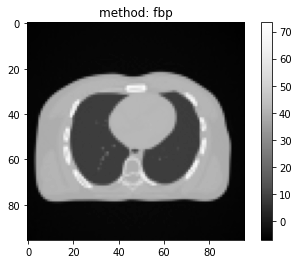

In [31]:
t1 = timeit.default_timer()
backproject_interpol()
t2 = timeit.default_timer()
print(f"Temps: {t2-t1:.2f}")

On remarque que les erreurs de hautes fréquences, semblables à du bruit, qui étaient présentes sur les précédentes reconstruction sont absentes ici. L a détermination des valeurs d'atténuation par interpolation linéaire a donc permis une amélioration significative de la qualité de la reconstruction. Selon l'indicateur de la cellule de code, le temps de reconstruction est de 1 minute et 23,1 secondes. Surprenamment, le temps d'exécution est significativement plus court que dans le cas sans interpolation linéaire. Cela est probablement dû à l'utilisation de la fonction *numpy.round* pour arrondir les distances dans le cas sans interpolation, ce qui prend plus de temps d'exécution que les fonctions *math.ceil* et *math.floor* utilisées pour arrondir à la hausse et à la baisse dans le cas avec interpolation.

### Question 6

On débute en écrivant une courte fonction pour effectuer l'interpolation linéaire. Elle prend en entrée une liste, qui sera dans notre cas la liste de fréquences de l'espace de Fourier de l'image, et la valeur de la fréquence du voxel d'intérêt. Elle retourne *inf* et *sup*, les indices inférieur et supérieur de part et d'autre de la valeur cherchée. Elle retourne aussi la distance *dist* de la valeur entre les deux points, normalisée entre 0 et 1. Ces trois variables nous permettront d'effectuer une interpolation linéaire pour déterminer la valeur du détecteur à utiliser pour peupler l'array de l'image dans l'espace de Fourier.

In [32]:
# BUT: déterminer les valeurs de part et d'autre de la valeur de référence
# Arguments:
# liste: liste de valeurs
# valeur qu'on cherche à situer dans la liste fournie
# Retourne:
# inf: indice du plus proche élément en dessous de 'valeur'
# sup: indice du plus proche élément au dessus de 'valeur'
# dist: valeur entre 0 et 1 de la distance de 'valeur' entre les éléments inférieur et supérieur (proche de 0 si valeur proche de liste[inf] et proche de 1 si valeur proche de liste[sup])
# boolean: un booléen True si la valeur se trouve dans l'array de fréquence de la projection, et False s'il se trouve à l'extérieur de celui-ci (ce qui provoquera une IndexError)

def interpol_lin(liste, valeur):

    liste = np.asarray(liste)
    liste_mod = liste - valeur
    indice = np.argmin((abs(liste_mod)))

    try:
        if liste_mod[indice] > 0:
            sup = indice
            inf = indice - 1
            dist = (valeur - liste[inf])/(liste[sup]-liste[inf])
        elif liste_mod[indice] < 0:
            sup = indice + 1
            inf = indice
            dist = (valeur - liste[inf])/(liste[sup]-liste[inf])
        elif liste_mod[indice] == 0:
            inf = indice
            sup = indice
            dist = 0
    except IndexError:
        inf, sup = 1, 1
        dist = 0
    return inf, sup, dist

On code maintenant la fonction *reconFourierSlice*, qui permet de reconstruire l'image avec le théorème de la tranche de Fourier. Pour ce faire, on effectue la FFT de chaque projection. Ensuite, on boucle sur les éléments de l'espace de Fourier de l'image et on choisit avec la méthode du plus proche voisin l'angle approprié pour la projection. On sélectionne aussi la projection éloignée de $\pi$, étant donné qu'elle passe aussi par le même voxel. On calcule alors la valeur du détecteur à utiliser pour chaque projection avec l'interpolation linéaire, et on additionne les deux valeurs obtenues au voxel. Finalement, on fait la transformée de Fourier inverse de l'image et on affiche celle-ci. Le fonctionnement de la fonction est décrit plus en détail dans la fonction elle-même.

In [33]:
def reconFourierSlice(sinogram, angles):
    
    # On fait la FFT de chaque projection et on les stocke dans sino_fft
    sino_fft = []
    for projection in sinogram:
        fft_proj = np.fft.ifftshift(np.fft.fft(np.fft.fftshift(projection)))
        sino_fft.append(fft_proj)

    # On génère une liste de fréquences spatiales pour les projections, longueur = nbpix et timestep = pixsize
    freq_proj = np.fft.fftshift(np.fft.fftfreq(geo.nbpix, geo.pixsize))

    # On génère une liste de fréquences spatiales pour l'image, longueur = nbvox et timestep = voxsize
    freq_im = np.fft.fftshift(np.fft.fftfreq(geo.nbvox, geo.voxsize))

    # On boucle maintenant sur tous les éléments de l'array de l'image dans le domaine de Fourier
    im_fft = np.zeros((geo.nbvox, geo.nbvox), 'complex')

    for i in range(geo.nbvox):
        for j in range(geo.nbvox):
            # On commence par associer à chaque pixel un indice par rapport au centre de l'array
            centre = geo.nbvox/2
            i_rel = i-centre
            j_rel = j-centre

            # On trouve l'angle du voxel par rapport à l'axe des abscisses positif du nouveau centre (on se rappelle que arctan2 retourne un angle entre -pi et pi)
            angle_vox = np.arctan2(i_rel, -j_rel)
            if angle_vox < 0:
                angle_vox += 2*np.pi

            # On trouve l'indice de la projection la plus proche de l'angle obtenu (plus proche voisin)
            liste_angles = angles - angle_vox
            indice = np.argmin((abs(liste_angles)))

            # On sélectionne aussi l'angle pi plus loin, car sa projection passe aussi par le voxel
            angle2_vox = np.arctan2(i_rel, -j_rel) + np.pi
            while angle2_vox > 2*np.pi:
                angle2_vox -= 2*np.pi

            # On sélectionne aussi l'indice de la projection la plus proche
            liste_angles = angles - angle2_vox
            indice2 = np.argmin((abs(liste_angles)))

            # Sélectionner les projections appropriées
            proj = sino_fft[indice]
            proj2 = sino_fft[indice2]

            # À partir de la position du voxel, on trouve sa fréquence spatiale en x et en y et on calcule la distance radiale en fréquence spatiale
            freq_x = freq_im[j]
            freq_y = freq_im[i]
            freq_r = np.sqrt(freq_x**2 + freq_y**2)

            # On trouve l'indice des éléments de part et d'autre de la fréquence radiale
            inf, sup, dist = interpol_lin(freq_proj, freq_r)
            inf2, sup2, dist2 = interpol_lin(freq_proj, -freq_r)

            # On interpole linéairement entre les deux valeurs du détecteur
            valeur = proj[inf] + dist * (proj[sup]-proj[inf])
            valeur2 = proj2[inf2] + dist2 * (proj2[sup2]-proj2[inf2])

            # On additionne les deux valeurs obtenues au voxel de l'image
            im_fft[i, j] += valeur + valeur2

    # Finalement, on fait la transformée de Fourier 2d inverse de l'image et on l'affiche
    image = np.real(np.fft.ifftshift((np.fft.ifft2(np.fft.fftshift(im_fft)))))
    util.saveImage(image, "Fourier slice theorem")

Les fonctions *fftshift* ont été utilisées avant et après les transformées de Fourier car elles augmentent grandement la qualité de l'image obtenue. On peut maintenant charger le sinogramme et la liste d'angles et effectuer la reconstruction de l'image:

Temps de reconstruction: 0.66 secondes


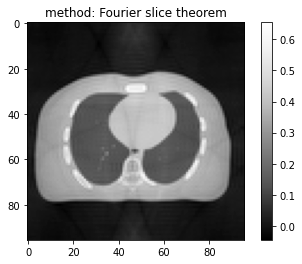

In [34]:
sinogram = readSinogram("data/sinogram-patient.txt")[2]
angles = readAngles("data/angles.txt")[1]

geo.nbvox = 96
geo.voxsize = 0.4

t1 = timeit.default_timer()
reconFourierSlice(sinogram, angles)
t2 = timeit.default_timer()

print(f"Temps de reconstruction: {t2-t1:.2f} secondes")

### Question 7

L'image obtenue est disponible dans le dossier du projet, ou alors elle peut être générée rapidement avec le code ci-dessus. On obtient une reconstruction très acceptable de l'image: la résolution semble même meilleure que celle obtenue avec la rétroprojection. Les contrastes de couleur sont mieux définis et on semble avoir une gamme de couleur plus large, ce qui permet de mieux distinguer les détails. Cependant, il y a présence d'un patron formant des losanges sur l'image, ce qui nuit quelque peu à sa résolution. Le temps de reconstruction, incluant le temps d'affichage de l'image, est d'environ 0,7 secondes sur notre machine.

### Question 8

On peut utiliser une grille d'image deux fois plus dense en changeant les valeurs de *nbvox* et *voxsize* (on double le premier et diminue de moitié le second):

Temps de reconstruction: 2.15 secondes


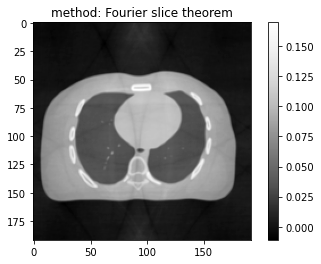

In [35]:
geo.nbvox = 192
geo.voxsize = 0.2

t1 = timeit.default_timer()
reconFourierSlice(sinogram, angles)
t2 = timeit.default_timer()

print(f"Temps de reconstruction: {t2-t1:.2f} secondes")

Cette fois-ci, le temps de reconstruction est d'environ 2,2 secondes, soit environ 3 fois plus que pour la grille précédente. On remarque immédiatement que les détails sont beaucoup plus fins et que la résolution est beaucoup meilleure (moins pixélisé). On perçoit mieux les contours des objets. On peut par exemple examiner les côtes: dans cette image, on voit clairement qu'il s'agit de contours blancs dont l'intérieur est gris. Dans l'image précédente, on ne distingue qu'une forme blanche et on perçoit difficilement l'intérieur. On perçoit aussi beaucoup mieux les détails des os entre les deux poumons et de la colonne, au bas de l'image. Cependant, on distingue encore le patron losange dans l'image.

L'amélioration des détails fins peut être expliqué par le principe de la transformée de Fourier. On sait que les détails fins, les changements brusques et marqués d'intensité et de contraste, sont représentés dans le domaine de Fourier par les hautes fréquences. Or, lorsqu'on double la taille de l'image, on double le nombre de fréquences dont on dispose (celles qu'on génère avec *fftfreq*) et donc on a accès à des fréquences deux fois plus élevées, et ces hautes fréquences représentent les détails de l'image une fois la transformée de Fourier inverse faite. Pour valider cette hypothèse, on peut *print* l'array *freq_im* pour chaque dimension d'image: on se rend alors compte que les fréquences vont d'environ -1,25 à 1,25 pour l'image 96x96, et d'environ -2,5 à 2,5 pour l'image 192x192. Étant donné que dans le deuxième cas, on a des termes avec des fréquences plus élevées, on est en mesure de mieux représenter les détails de l'image.

On peut aussi s'intéresser au théorème de Nyquist-Shannon. Sous sa forme la plus simple, il nous informe que:

*La représentation discrète d'un signal exige des échantillons régulièrement espacés à une fréquence d'échantillonnage supérieure au double de la fréquence maximale présente dans ce signal. [1]*

Tâchons donc d'expliquer avec ce théorème pourquoi le fait de doubler la taille de l'image nous permet de mieux représenter les hautes fréquences, et donc les détails.

Soit l'image 1 qui a une taille de 96x96 et l'image 2 qui a une taille de 192x192. La fréquence d'échantillonnage est proportionnelle au nombre de fréquences de l'array *im_freq* divisé par la longueur sur laquelles ces valeurs sont réparties. Dans le cas de l'image 1, nous disposons de 96 fréquences différentes réparties sur la grandeur physique de l'image. Pour l'image 2, cette grandeur physique reste la même (on a deux fois plus de voxels par côté, mais ils sont deux fois plus petits alors la taille reste la même), mais étant donné qu'on dispose de deux fois plus de fréquences (l'array *im_fft* est deux fois plus long), la fréquence d'échantillonnage pour l'image 2 est le double de celle de l'image 1.

Puisque la fréquence d'échantillonnage est deux fois plus élevée, il en découle qu'on peut représenter des fréquences maximales deux fois plus élevées aussi. Si on devait traduire le théorème en expression mathématique, on aurait que, pour pouvoir bien représenter un signal de fréquence maximale $f_{max}$, on doit avoir:

$$1<\frac{f_{ech}}{2f_{max}}$$

Donc, si la fréquence d'échantillonnage est deux fois plus élevée, on peut représenter un signal ayant une fréquence maximale deux fois plus élevée aussi, ce qui nous permet de mieux rendre les détails de l'image. On explique ainsi que le fait de doubler la taille d'image nous permette de mieux représenter les détails.

Par curiosité, on peut maintenant se demander si on pourrait éternellement doubler la taille de l'image (doubler le nombre de voxels et diviser leur taille par deux), ce qui nous permettrait d'augmenter sans cesse la fréquence d'échantillonnage et donc de représenter dex fréquences maximales plus élevées, ce qui rendrait la résolution meilleure. Pour répondre à cette question, affichons les transformées de Fourier des images 1 et 2 une fois peuplées par les valeurs des détecteurs (ignorer les couleurs, ce qui importe est le fait que l'espace soit peuplé ou non):

![FFT de l'image 1](Ex1.png)

![FFT de l'image 2](Ex2.png)

On constate que, pour l'image 1, l'espace de Fourier est entièrement peuplé, tandis que pour l'image 2 les coins ne le sont pas. Ceci est dû au fait que les coins sont radialement plus éloignés, ils correspondent donc aux fréquences plus élevées. Cependant, pour l'image 2, malgré qu'on ait augmenté la plage de fréquences liées à l'image, la taille des projections qui y sont associées est demeurée identique. Il arrive donc un moment où nous avons besoin d'une fréquence si élevée qu'elle ne se trouve pas dans la plage de fréquence associée à la FFT de la projection, soit *freq_proj*. C'est pour cette raison qu'il y a une clause *except IndexError* dans la fonction *interpol_lin*. On pourrait donc augmenter encore la taille de l'image, mais nous ne pourrions tout de même pas peupler une aire significativement plus grande de la transformée de Fourier puisque nous sommes limités par la taille du détecteur et du nombre de pixels de celui-ci. Pour pouvoir doubler la taille de l'image et augmenter sa résolution infiniment, on aurait besoin d'un détecteur avec une résolution infinie aussi.

### Question 9

On obtient approximativement les temps d'éxécution suivants pour toutes les méthodes sur notre machine:

Rétroprojection filtrée (question 4): 87 secondes
Reconstruction TF2D (question 6): 0,7 secondes
Reconstruction TF2D avec sur-echantillonnage (question 7): 2,2 secondes

Les temps d'éxécution sont donc significativement plus courts pour la reconstruction TF2D à l'aide du théorème des tranches de Fourier qu'avec la rétroprojection filtrée. la reconstruction se fait environ 124 fois plus rapidement pour la même taille d'image, et 40 fois plus rapidement même pour une image deux fois plus grande.

Pour les reconstructions TF2D, on a deux boucles imbriquées qui bouclent sur chaque élément de l'image; on a donc $96^2=9216$ itérations pour l'image 96x96, et 36864 itérations pour l'image 192x192. À noter qu'on a 4 fois plus d'itérations pour l'image 192x192 alors que le temps d'éxécution est environ 3 fois plus élevé, ce qui nous indique qu'une partie du temps d'éxécution est associée à l'affichage de l'image finale (et ce temps sera environ le même peu importe la taille de l'image).

Pour la rétroprojection filtrée, on itère aussi sur tous les éléments de l'image, mais on a aussi une troisième boucle qui itère sur tous les angles du fichier *angles.txt*. On a donc au total $96^2\cdot 720 = 6635520$ itérations. Ce nombre est $6635520/36864=180$ fois plus élevé que pour l'image TF2D 192x192 alors que le temps d'éxécution est environ 40 fois plus élevé, ce qu'on peut expliquer par le fait qu'il y a beaucoup plus d'opérations par itération pour la TF2D. Alors même s'il y a 180 fois moins d'itérations, il n'y a pas 180 fois moins d'opérations.

### Médiagraphie

[1] Théorème d'échantillonnage, Wikipédia, consulté le 23 avril, https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_d%27%C3%A9chantillonnage